# Time-Series Forecasting

### Introduction:
Unicorn Ventures is currently evaluating the potential investment in JetRail, a pioneering transportation solution utilizing Jet propulsion technology on rails. JetRail holds a patented product and has demonstrated proficiency in its technology. The crucial factor for Unicorn Ventures is the projection of acquiring more than 1 million monthly users within the next 18 months.

### Objective:
The primary objective is to forecast the traffic on JetRail for the next 7 months using Time-Series Forecasting

### Hypothesis

1. Traffic will increase as the years pass by <br>
2. Traffic will be high from May to October <br>
3. Traffic on weekdays will be more <br>
4. Traffic during the peak hours will be high

### Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r"C:\Users\MyKy\Desktop\Data Science\Datasets\Time Series\Train_SU63ISt.csv")
test=pd.read_csv(r"C:\Users\MyKy\Desktop\Data Science\Datasets\Time Series\Test_0qrQsBZ.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

### Data Exploration

In [4]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [5]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [6]:
print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


In [7]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [8]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
train.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [11]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [12]:
test.isnull().sum()

ID          0
Datetime    0
dtype: int64

## Feature Extraction

In [13]:
# Changing obj into datetime format
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [14]:
# Loop through the specified DataFrames and add new columns for year, month, day, and hour
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

In [15]:
# Add a new column 'day of week' to the 'train' DataFrame
train['day of week']=train['Datetime'].dt.dayofweek

# Assign the 'Datetime' column to the variable 'temp'
temp = train['Datetime']

In [16]:
# Define a function to check if the day is a weekend
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
# Apply the function to each row in the 'Datetime' column
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

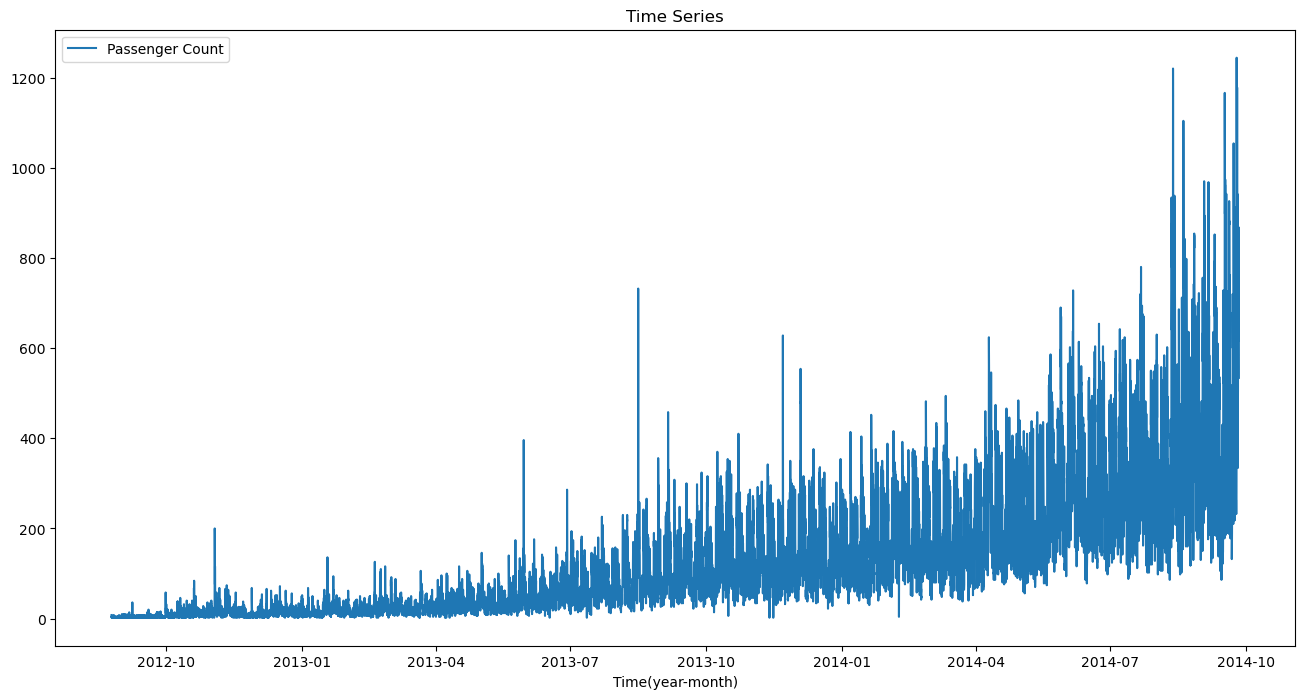

In [17]:
# Set 'Datetime' column as the index
train.index = train['Datetime']

# Drop the 'ID' column along the columns axis
df = train.drop('ID', axis=1)

# Extract the 'Count' column as a time series
ts = df['Count']

# Plot the time series
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.legend(loc='best')

```We can see that there is an increasing trend in the series, i.e, the number of count in increasing with respect to time.
We can also see sudden increase in the number of counts, possibly on particular day due to some event the traffic was high.```

# Exploratory Analysis

Let's try to verify our hypothesis using actual data.

<Axes: xlabel='year'>

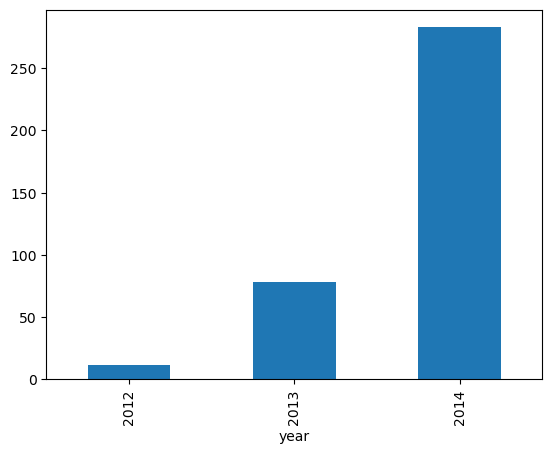

In [18]:
# plotting yearly passenger count
train.groupby('year')['Count'].mean().plot.bar()

There is an exponential growth in the traffic with respect to year which validates our first hypothesis.

<Axes: xlabel='month'>

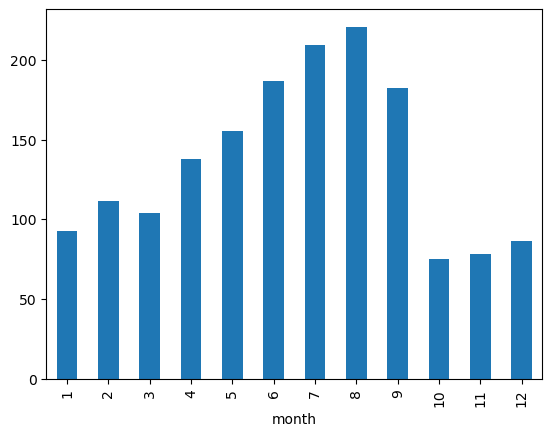

In [19]:
# plotting monthly passenger count
train.groupby('month')['Count'].mean().plot.bar()

Here, we see a decrease in the mean of passenger count in the last three months. <br>
Lets look at the monthly mean of each year.

<Axes: title={'center': 'Passenger Count (Monthwise)'}, xlabel='year,month'>

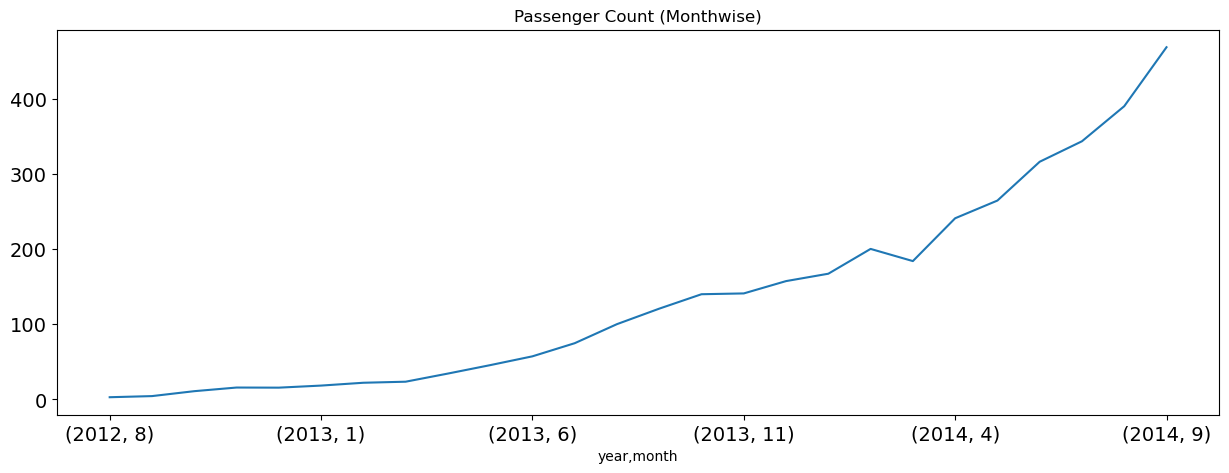

In [20]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title = 'Passenger Count (Monthwise)', fontsize = 14)

We can see that the months 10, 11 and 12 are not present for year 2014 and the mean value for these months in year 2012 is very small. <br>
Above line plot shows that there is increasing trend in monthly passenger count and the growth is approximately exponential.

<Axes: xlabel='day'>

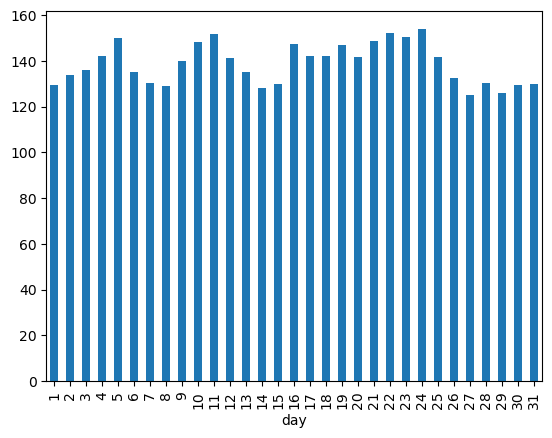

In [21]:
# plotting daily passenger count
train.groupby('day')['Count'].mean().plot.bar()

<Axes: xlabel='hour'>

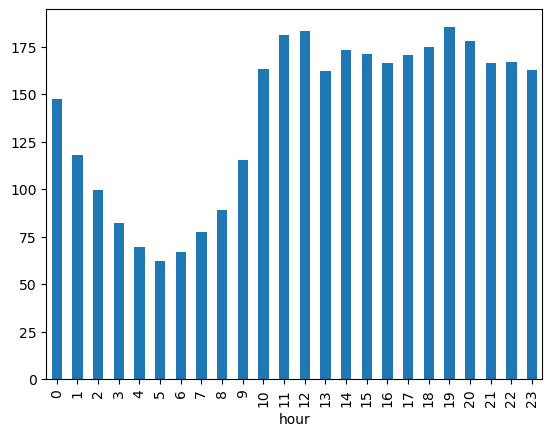

In [22]:
# plotting hourly passenger count
train.groupby('hour')['Count'].mean().plot.bar()

We can see that the peak traffic is at 7 PM and then decrease till 5 AM. <br>
After that the passenger count starts to increase and peaks again between 11 AM and noon.

<Axes: xlabel='weekend'>

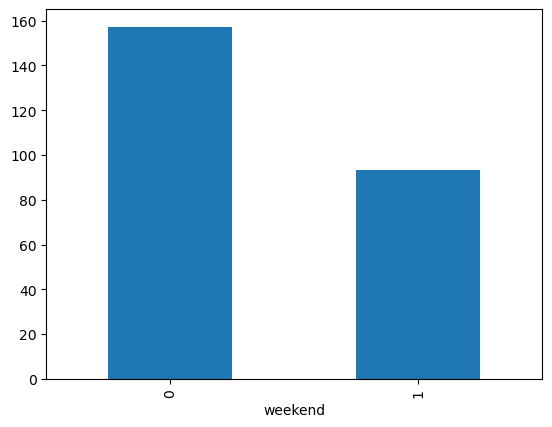

In [23]:
# plotting passenger count on weekend and weekday
train.groupby('weekend')['Count'].mean().plot.bar()

Now we can see that the traffic is more on weekdays(0) as compared to weekends(1) which validates the third hypothesis.

<Axes: xlabel='day of week'>

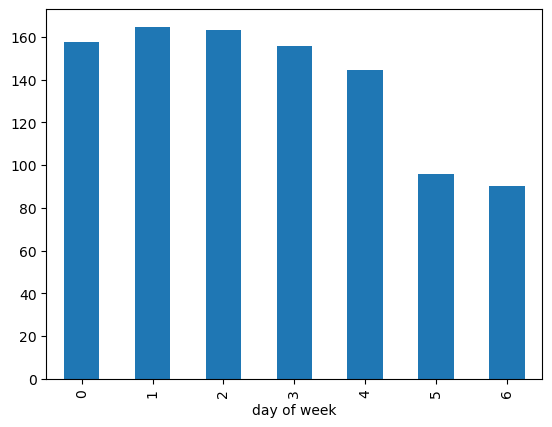

In [24]:
# plotting daywise passenger count
train.groupby('day of week')['Count'].mean().plot.bar()

Note: 0 = Monday, 1 = Tuesday, .... <br>
From the above bar plot, we can see that the passenger count is less on saturday and sunday as compared to other days.

In [25]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H-%M')
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# converting to daily mean
daily = train.resample('D').mean()

# converting to weekly mean
weekly = train.resample('W').mean()

# converting to monthly mean
monthly = train.resample('M').mean()

<Axes: title={'center': 'monthly'}, xlabel='Datetime'>

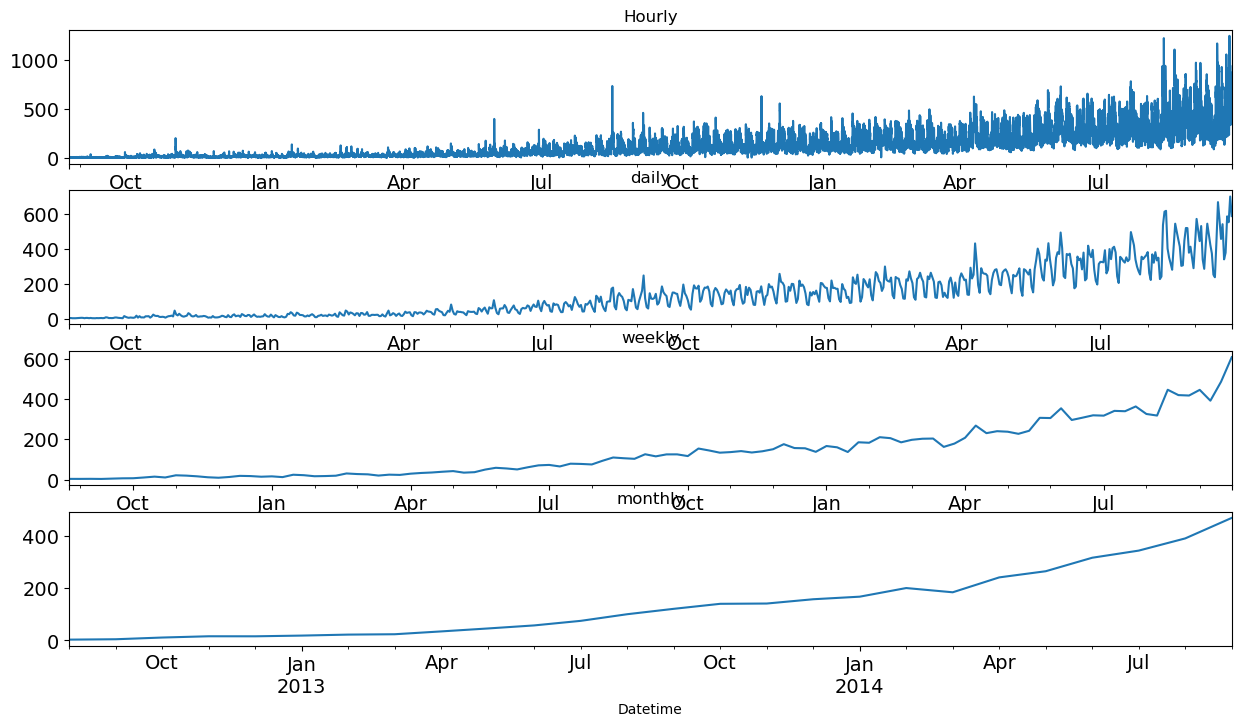

In [26]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='monthly', fontsize=14, ax=axs[3])

Now, we can see clear trend after aggregating it. This transformation helps in simplifying the data, reducing noise, and revealing patterns.

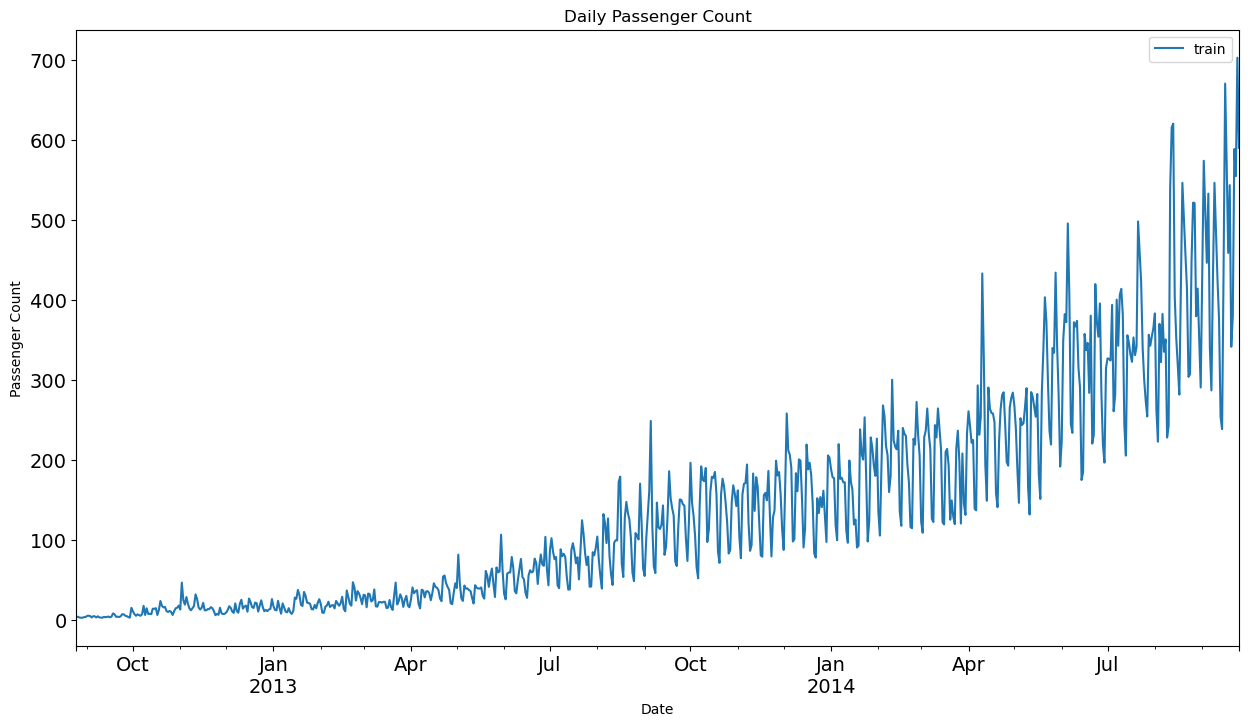

In [27]:
daily['Count'].plot(figsize=(15, 8), title='Passenger Count', fontsize=14, label='train')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Daily Passenger Count')
plt.legend(loc='best')
plt.show()

### Splitting the data into training and validation part

In [28]:
daily.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'hour',
       'day of week', 'weekend'],
      dtype='object')

In [29]:
daily['Datetime'].max()

Timestamp('2014-09-25 11:30:00')

In [30]:
daily.shape

(762, 9)

In [31]:
daily.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25,11.5,2012-08-25 11:30:00,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,2012-08-26 11:30:00,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2012-08-27 11:30:00,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2012-08-28 11:30:00,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2012-08-29 11:30:00,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [32]:
# split the data into 80/20
train_data, validation_data = train_test_split(daily, test_size=0.15, shuffle=False)

# Convert the 'Date' column to datetime type
#daily['day'] = pd.to_datetime(daily['day'])

# Sort the DataFrame by date
#daily = daily.sort_values(by='day')

# Specify the start and end dates for the split
#start_date = pd.to_datetime('2012-08-25')
#end_date = pd.to_datetime('2014-09-25')

# Split the data into training and validation sets
#train_data = daily[daily['day'] < '2014-06-25']
#validation_data = daily[(daily['day'] >= '2014-06-25') & (daily['day'] <= end_date)]

# Print the sizes of the training and validation sets
#print("Training set size:", len(train_data))
#print("Validation set size:", len(validation_data))

In [33]:
# df['Datetime'] = pd.to_datetime(df['Datetime'])

# Specify the start and end dates for the split
# start_date = pd.to_datetime('2012-08-25')
#end_date = pd.to_datetime('2014-09-25')

# Split the data into training and validation sets
#train_data = df[df['Datetime'] < '2014-06-25']
#validation_data = df[(df['Datetime'] >= '2014-06-25') & (df['Datetime'] <= end_date)]

# Print the sizes of the training and validation sets
#print("Training set size:", len(train_data))
#print("Validation set size:", len(validation_data))

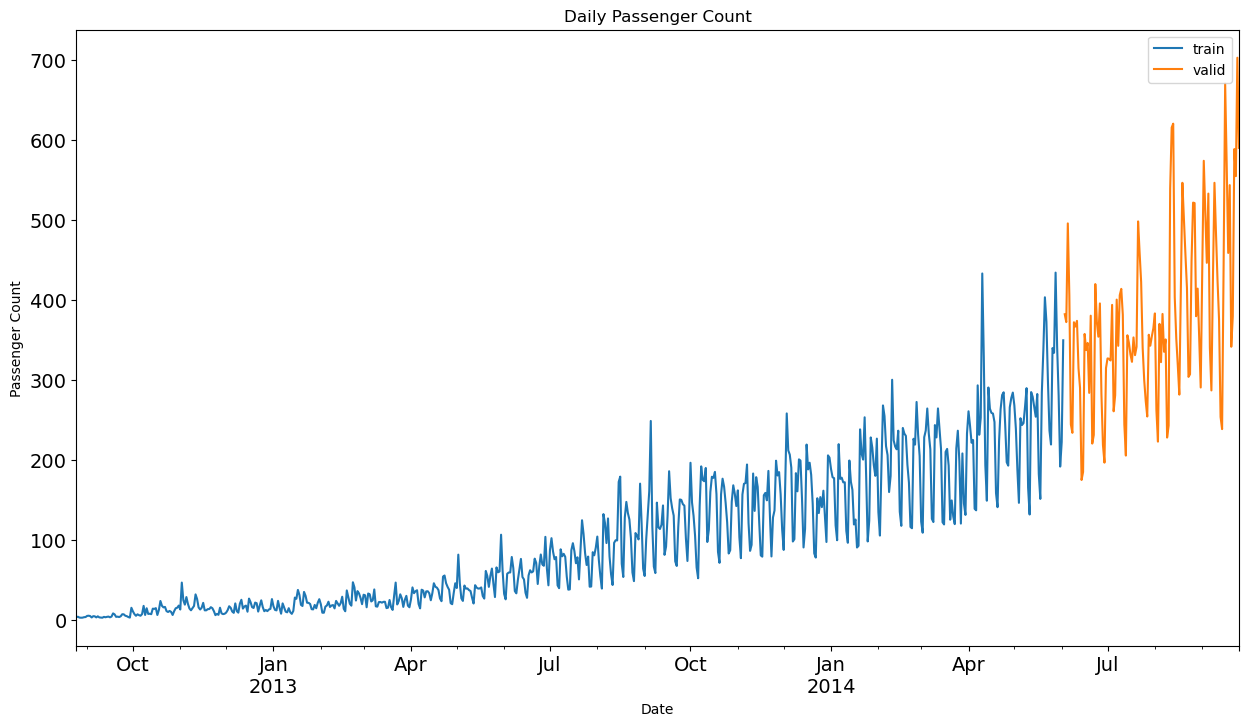

In [34]:
# Plot the results
train_data['Count'].plot(figsize=(15, 8), title='Daily Passenger Count (Training)', fontsize=14, label='train')
validation_data['Count'].plot(figsize=(15, 8), title='Daily Passenger Count (Validation)', fontsize=14, label='valid')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Daily Passenger Count')
plt.legend(loc='best')
plt.show()

Blue part represents training data and orange part represents validation data. \
Now, its time to predict the traffic for the validation part. Then, visualize how accurate our predictions are.

# Moving Averages

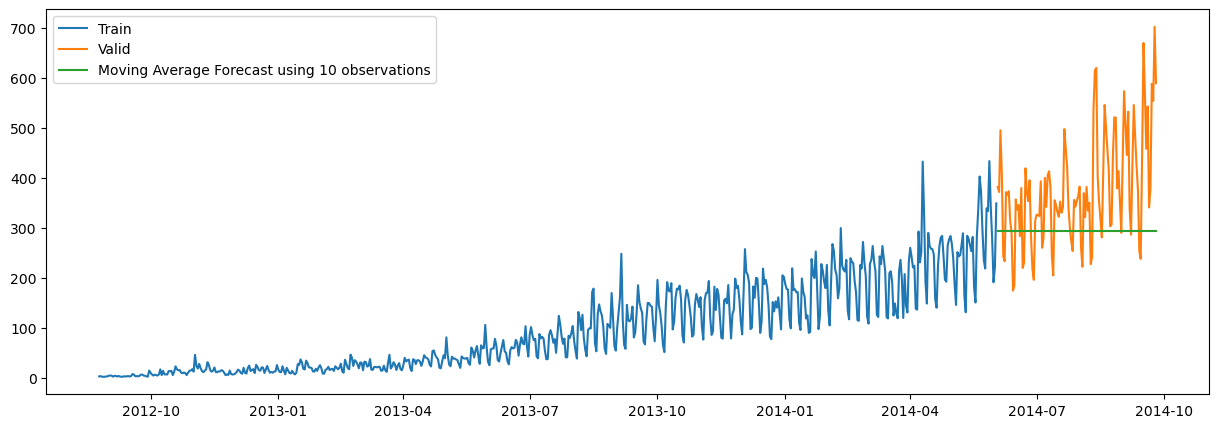

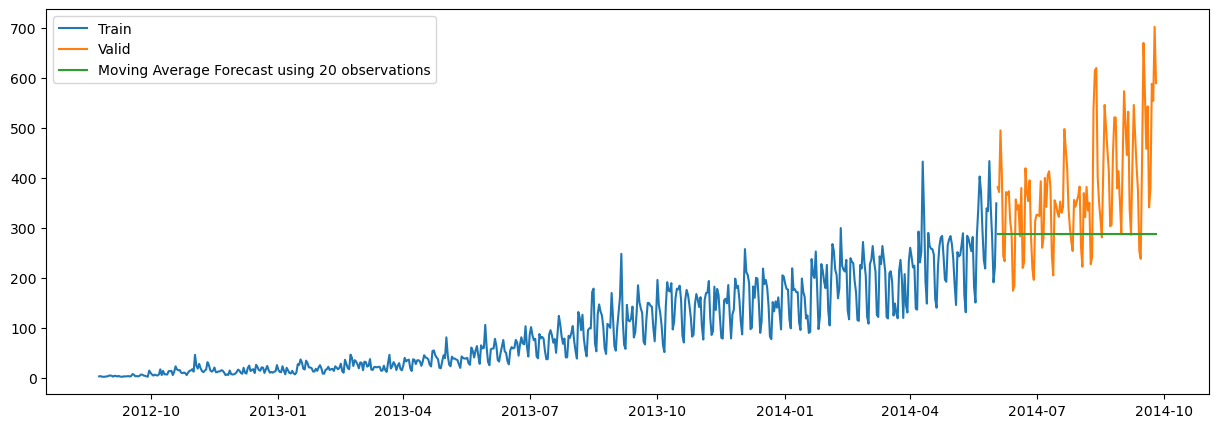

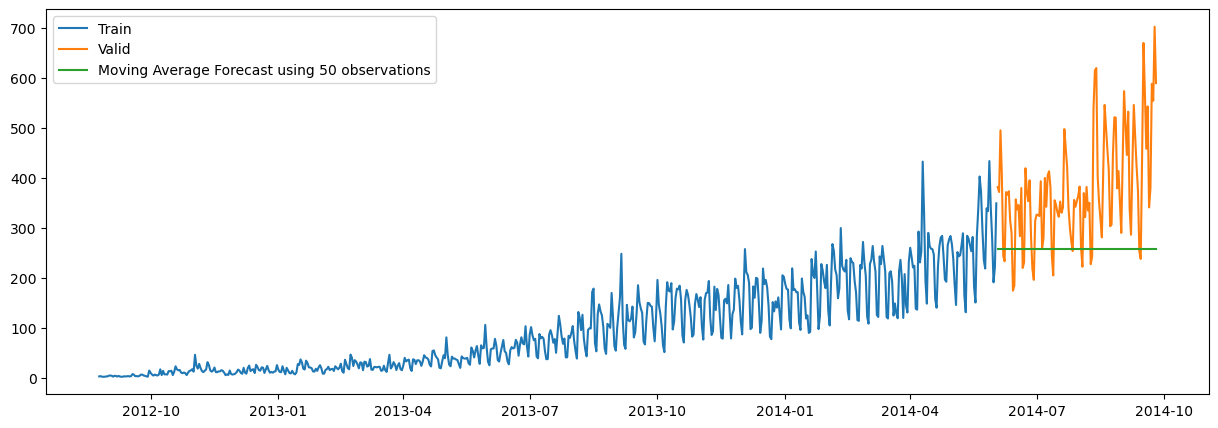

In [35]:
y_hat_avg = validation_data.copy()
y_hat_avg['moving_avg_forecast'] = train_data['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg['moving_avg_forecast'] = train_data['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg['moving_avg_forecast'] = train_data['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [36]:
rms = sqrt(mean_squared_error(validation_data['Count'], y_hat_avg['moving_avg_forecast']))
rms

161.02783298552612

We can see that the predictions are getting weaker as we increase the number of observations.

# Single Exponential Smoothing (SES)

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [38]:
fit2 = SimpleExpSmoothing(np.asarray(train_data['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(validation_data))

In [39]:
y_hat_avg.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'hour',
       'day of week', 'weekend', 'moving_avg_forecast', 'SES'],
      dtype='object')

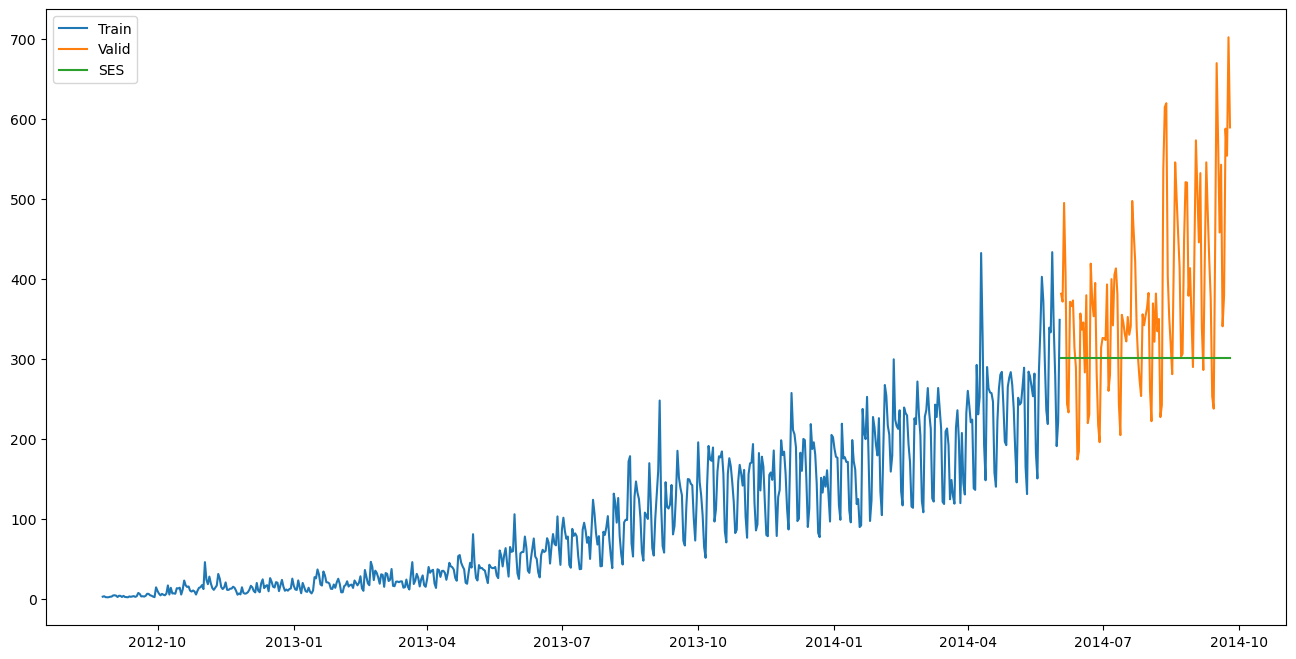

In [40]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [41]:
rms = sqrt(mean_squared_error(validation_data['Count'], y_hat_avg.SES))
rms

132.32596347957485

We can see that the fit of the model has improved as the RMSE value has reduced.

# Double Exponential Smoothing (Holt's linear trend model)

ADF Statistic: 1.665607097933914
p-value: 0.9980416434696814
Critical Values: {'1%': -3.4408393249134326, '5%': -2.86616806030903, '10%': -2.569234676071002}


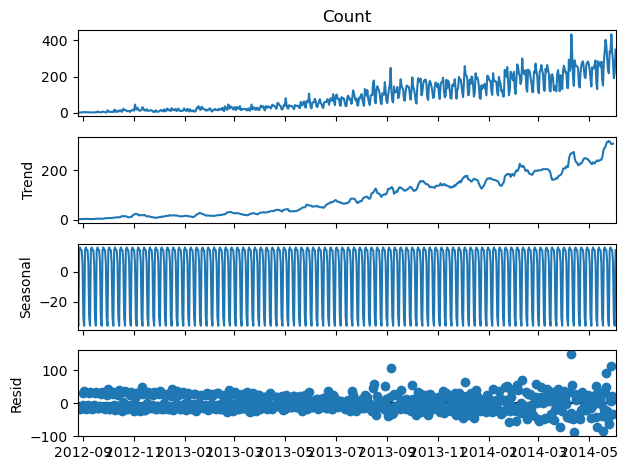

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

result = adfuller(train_data.Count)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Plot the seasonal decomposition
sm.tsa.seasonal_decompose(train_data.Count).plot()
plt.show()

C:\Users\MyKy\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


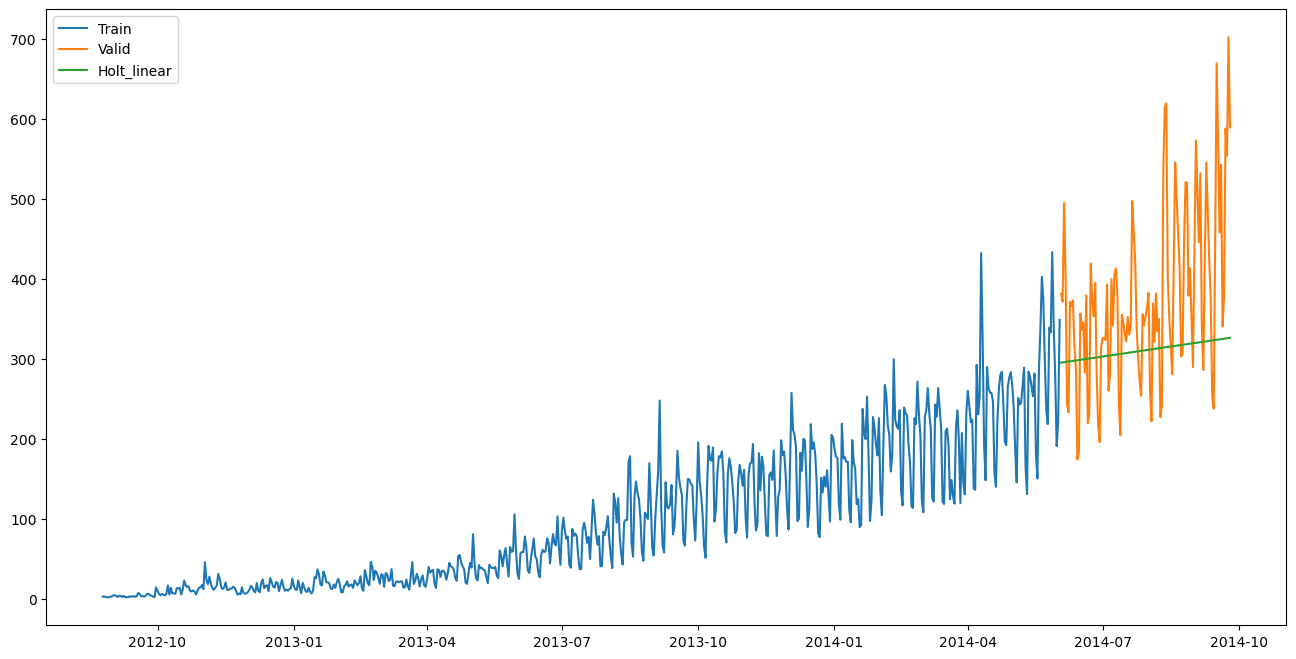

In [43]:
from statsmodels.tsa.holtwinters import Holt

y_hat_avg = validation_data.copy()

# Fit Holt linear trend model to training data
fit1 = Holt(np.asarray(train_data['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)

# Forecast using the fitted model on the validation data
y_hat_avg['Holt_linear'] = fit1.forecast(len(validation_data))

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


In [44]:
rms = sqrt(mean_squared_error(validation_data['Count'], y_hat_avg.Holt_linear))
rms

123.27190315290589

It can be seen that the RMSE value decreased.

# Triple Exponential Smoothing (Holt-Winters method)

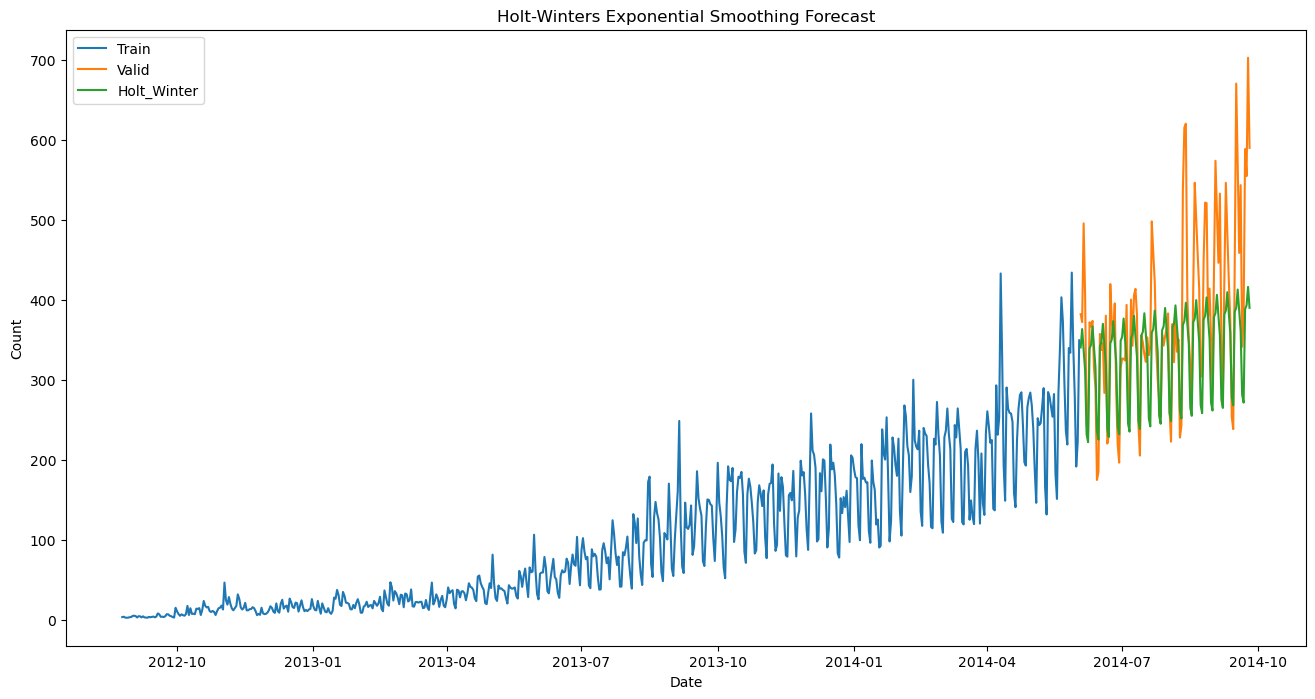

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
fit1 = ExponentialSmoothing(np.asarray(train_data['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()

# Generate forecasts for the validation set
y_hat_avg = pd.DataFrame({'Holt_Winter': fit1.forecast(len(validation_data))}, index=validation_data.index)

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(train_data['Count'], label='Train')
plt.plot(validation_data['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(validation_data['Count'], y_hat_avg.Holt_Winter))
rms

87.20267367200307

It can be seen that the RMSE value decreased.